In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc,html
import folium


In [2]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv')
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [3]:
df.isna().any()

tenure      False
age         False
address     False
income      False
ed          False
employ      False
equip       False
callcard    False
wireless    False
longmon     False
tollmon     False
equipmon    False
cardmon     False
wiremon     False
longten     False
tollten     False
cardten     False
voice       False
pager       False
internet    False
callwait    False
confer      False
ebill       False
loglong     False
logtoll     False
lninc       False
custcat     False
churn       False
dtype: bool

In [4]:
df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [5]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss


In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [8]:
df=df[['tenure','age','address','income','ed','employ','equip','churn']]
df['churn']=df['churn'].astype('int')
df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [9]:
x=np.asarray(df[['tenure','age','address','income','ed','employ','equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y=np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [11]:
ss=StandardScaler()
x_norm=ss.fit_transform(x)
x_norm

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]], shape=(200, 7))

In [12]:
x_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42)

In [14]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
coef_1=lr.coef_
intercept_1=lr.intercept_
print(coef_1)
print(intercept_1)

[[-0.61194839 -0.31272426  0.16708781  0.06276296  0.31148584 -0.65548037
   0.37311316]]
[-1.19246736]


In [16]:
yhat_prob=lr.predict_proba(x_test)
yhat_prob[:10]

array([[0.51878155, 0.48121845],
       [0.22539374, 0.77460626],
       [0.78053821, 0.21946179],
       [0.68476137, 0.31523863],
       [0.82116484, 0.17883516],
       [0.30994702, 0.69005298],
       [0.97893094, 0.02106906],
       [0.53468732, 0.46531268],
       [0.50226993, 0.49773007],
       [0.90300796, 0.09699204]])

In [17]:
coefficients=pd.Series(lr.coef_[0],index=df.columns[:-1])
coefficients

tenure    -0.611948
age       -0.312724
address    0.167088
income     0.062763
ed         0.311486
employ    -0.655480
equip      0.373113
dtype: float64

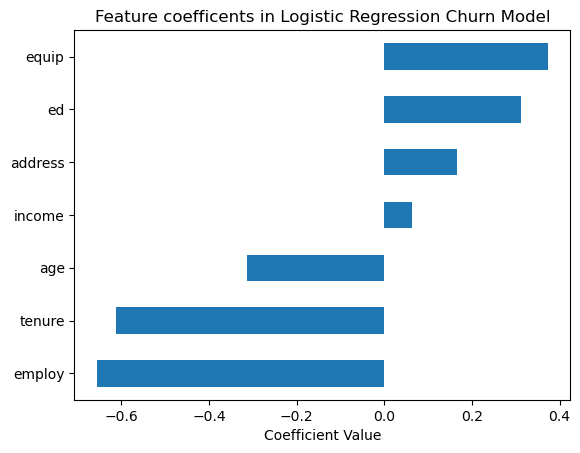

In [18]:
coefficients.sort_values().plot(kind='barh')
plt.title('Feature coefficents in Logistic Regression Churn Model')
plt.xlabel('Coefficient Value')
plt.show()

In [19]:
log_loss(y_test,yhat_prob)

0.4068959657047867

In [20]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn'], dtype='object')